In [2]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import shap
import numpy as np

/Users/devin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
EMBEDDING_MODEL = 'GanymedeNil_text2vec-large-chinese'
EMBEDDING_TYPE = 'title&pyq'
SEED = 19260817

In [4]:
train_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/train_dataset_{EMBEDDING_TYPE}.csv')
val_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/val_dataset_{EMBEDDING_TYPE}.csv')
test_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/test_dataset_{EMBEDDING_TYPE}.csv')

### fit the model

In [5]:
train_X = train_df.drop('label', axis = 1)
train_Y = train_df['label']
test_X = test_df.drop('label', axis = 1)
test_Y = test_df['label']
val_X = val_df.drop('label', axis = 1)
val_Y = val_df['label']

In [6]:
CB_model = CatBoostRegressor(n_estimators=25, max_depth=16, subsample = 0.4, colsample_bylevel = 1, max_bin = 64, reg_lambda = 1, learning_rate = 1, random_seed = SEED, verbose = False)

In [7]:
CB_model.fit(train_X, train_Y)

In [8]:
val_y_pred = CB_model.predict(val_X)
val_r2 = r2_score(val_Y, val_y_pred)
val_r2

0.2610437563786808

In [9]:
test_y_pred = CB_model.predict(test_X)
test_r2 = r2_score(test_Y, test_y_pred)
test_r2

0.16427255118453077

### get feature importance

In [10]:
feature_importance = CB_model.feature_importances_

In [11]:
importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': feature_importance
})

In [12]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
50,title_18,1.057359e+01
63,title_31,9.613966e+00
4,pyq_text_4,7.869373e+00
59,title_27,7.839637e+00
20,pyq_text_20,7.812766e+00
...,...,...
62,title_30,3.356700e-07
31,pyq_text_31,2.949161e-07
24,pyq_text_24,2.042297e-07
7,pyq_text_7,1.094717e-09


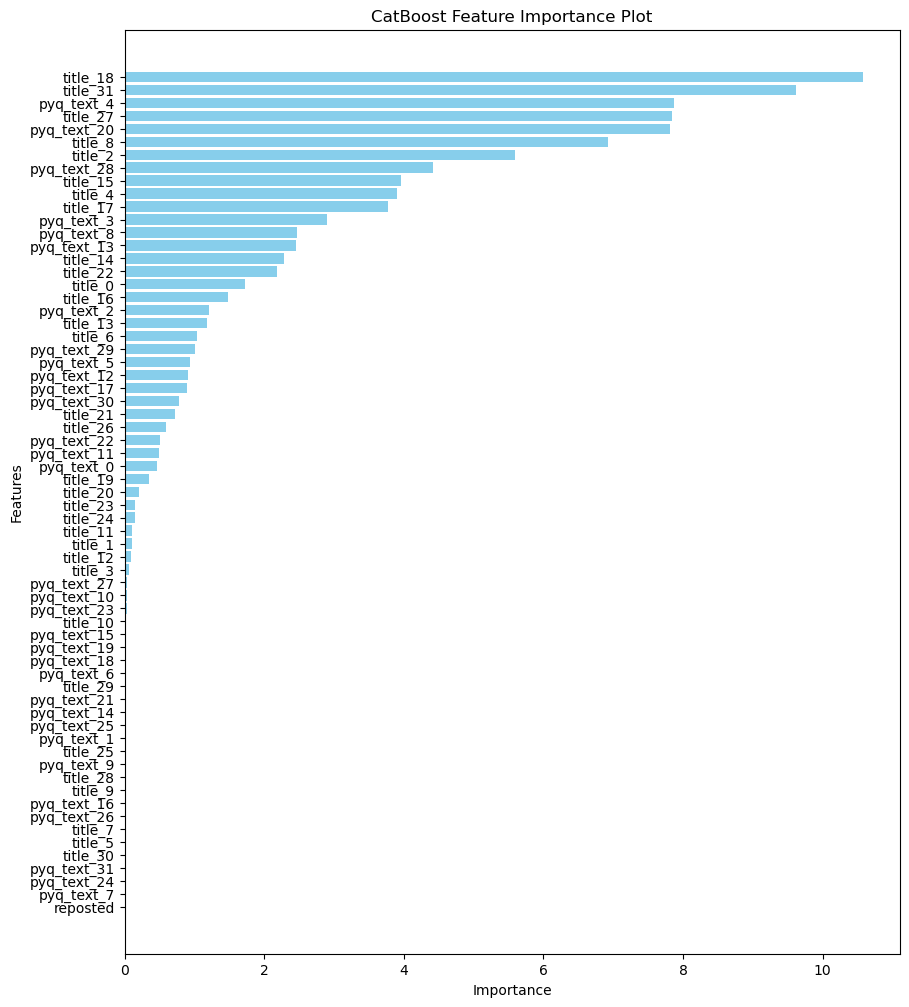

In [13]:
plt.figure(figsize=(10,12))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()

### SHAP

In [14]:
shap.initjs

<function shap.plots._force.initjs()>

In [15]:
explainer = shap.TreeExplainer(CB_model)
shap_value = explainer.shap_values(test_X)

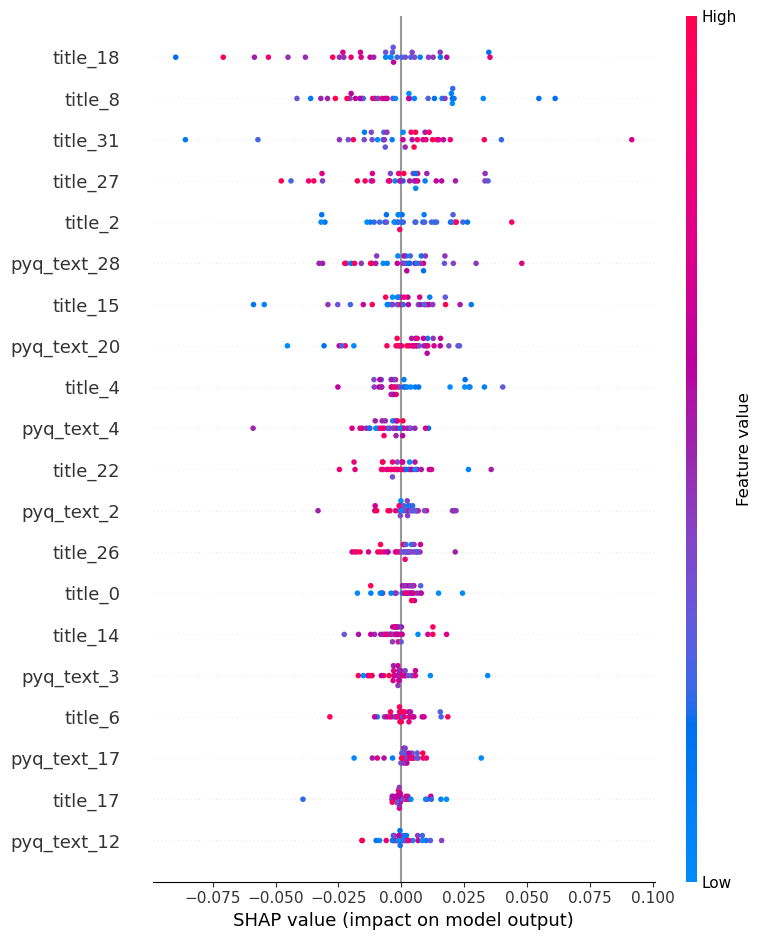

In [16]:
shap.summary_plot(shap_value, test_X)

In [20]:
test_X

,pyq_text_0,pyq_text_1,pyq_text_2,pyq_text_3,pyq_text_4,pyq_text_5,pyq_text_6,pyq_text_7,pyq_text_8,pyq_text_9,...,title_23,title_24,title_25,title_26,title_27,title_28,title_29,title_30,title_31,reposted
0,-1.319316,-1.717670,4.450049,1.754873,-2.037978,0.519080,1.024571,1.130180,1.459593,1.866797,...,1.629003,-0.820174,0.664635,-0.851104,0.566950,0.742867,0.064546,-0.931770,-2.027699,0
1,-3.142977,-2.195046,0.062012,-1.292514,-0.318410,0.556594,1.030067,-0.505104,-1.422583,1.545877,...,-0.345104,0.329684,0.407269,0.464678,-0.029019,-0.386597,-0.157396,0.192732,-0.616021,0
2,-1.508712,-0.489061,-0.277745,-1.309063,0.872010,1.279348,-1.964006,-1.265656,0.242782,0.843760,...,0.908715,1.223065,-1.818702,-0.797798,-0.190718,0.077699,0.690581,0.984364,-0.847298,0
3,-1.486468,-3.865947,-0.051737,-1.827426,-0.103812,3.260020,-0.702042,0.820092,0.662822,-0.093668,...,-1.800216,0.235330,1.457606,0.402001,0.614053,1.679650,0.213461,-0.401772,0.626422,0
4,-1.405225,-2.683301,-1.208458,2.929110,-1.574469,-3.034415,5.609444,3.727747,-0.258201,-0.457827,...,0.137766,-0.491970,-0.257133,-0.530436,-2.094469,1.761321,-0.251687,3.923320,0.360157,0
5,-0.994416,-1.751388,2.466543,-0.613198,0.355980,1.334559,3.735766,-1.586013,1.531520,-1.079099,...,0.449792,-0.786430,0.415426,0.690521,1.089509,0.574311,0.943865,0.685028,0.513962,0
6,18.693310,-0.358538,0.545302,0.197169,-0.517227,-0.567371,-0.336302,0.214167,-0.105553,-0.245922,...,0.066087,0.148622,-0.973117,1.465179,0.019211,-0.344589,0.133812,0.349096,0.726624,0
7,-1.203106,-0.326537,-1.384546,-0.114596,0.371072,0.184504,-0.349739,-2.310010,-1.989276,0.793558,...,1.111202,-0.111032,1.284784,0.372288,-0.469483,1.258015,0.298774,0.811315,0.410615,0
8,4.361288,0.686148,0.992822,0.550371,-1.044482,0.703147,0.418194,-2.092008,0.672540,-0.817979,...,-0.168841,1.043520,-0.106685,-2.088754,0.345639,-0.571432,0.861931,1.031302,-0.226761,0
9,-2.998634,1.557477,0.302768,-1.138912,1.925925,-1.546256,0.750326,-1.744214,-0.573137,1.109078,...,0.822464,0.737727,0.740794,0.883366,-2.434215,-0.263017,-0.496651,0.453871,-1.543681,0


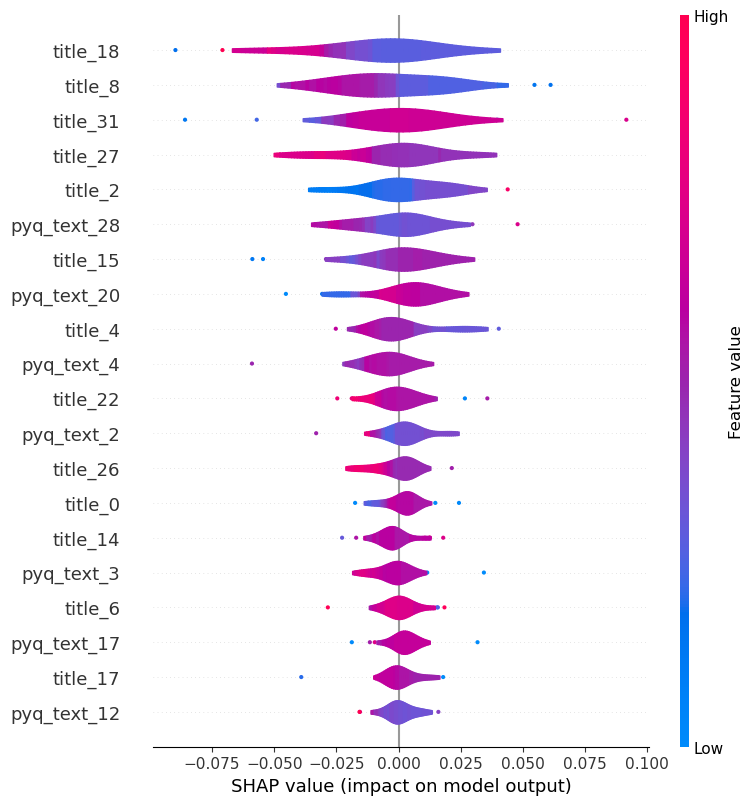

In [19]:
shap.plots.violin(shap_value, test_X)

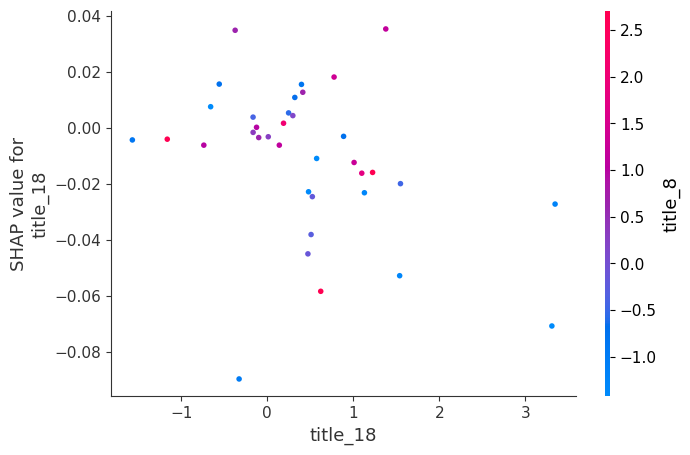

In [18]:
shap.dependence_plot('title_18', shap_value, test_X, interaction_index='title_8')